In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
df = pd.read_csv('prelim_datasets/gameandgrade.csv')

# Cleaning the data of any null values it can find
df_cleaned = df.dropna()

df_cleaned['Grade'] = pd.to_numeric(df_cleaned['Grade'], errors='coerce')

df_cleaned = df_cleaned.dropna(subset=['Grade'])

print(df_cleaned.head())

   Sex  School Code  Playing Years  Playing Often  Playing Hours  \
0    0            1              1              2              1   
1    1            1              1              3              1   
2    0            1              0              0              0   
3    0            1              3              5              1   
4    1            1              1              1              2   

   Playing Games  Parent Revenue  Father Education  Mother Education  Grade  
0              1               4                 4                 5   77.5  
1              1               1                 3                 3   83.0  
2              0               1                 3                 3   80.0  
3              1               2                 2                 3   45.0  
4              1               1                 3                 4   85.0  


In [76]:
# I chose these variables as from the linear-regression notebook, I found that these variables have the closest correlation to Grades (except School Code as that is just a Unique Identifier)

X = df_cleaned[['Mother Education', 'Father Education', 'Playing Often']]
y = df_cleaned['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [77]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [78]:
y_pred = model.predict(X_test)

In [79]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 243.9261
Root Mean Squared Error: 15.6181
R-squared: 0.1185


In [80]:
coefficients = pd.DataFrame({
    'Variables': X.columns,
    'Coefficient': model.coef_
})
print('\nCoefficients:')
print(coefficients)
print(f'Intercept: {model.intercept_:.4f}')


Coefficients:
          Variables  Coefficient
0  Mother Education     3.573491
1  Father Education     2.897062
2     Playing Often     0.406434
Intercept: 55.0990


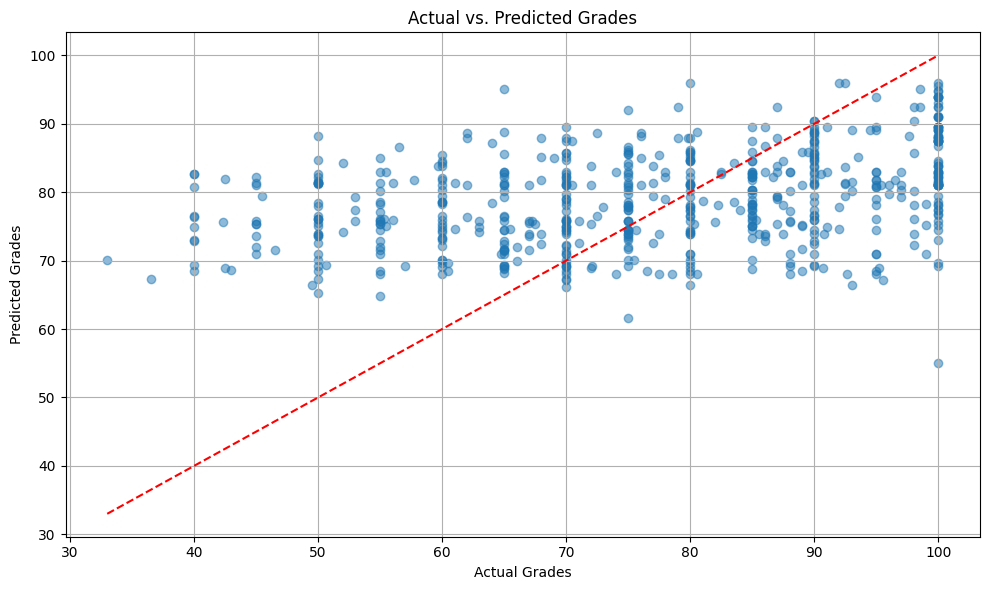

In [81]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.title('Actual vs. Predicted Grades')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.grid(True)
plt.tight_layout()
plt.show()

It's a better predictor than the single linear regression model I did but I think it's still not a perfect model. Perhaps because there's actually a lot more factors that impact grades aside from the ones found in the dataset and that I used - I tested it using all variables as well and the improvement was minimal and the result was more or less the same.